# MARKET SEGMENTATION ON BUYER'S BEHAVIOUR DATA

# Data preprocessing

In [33]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [34]:
# Load the data from csv file to a Pandas DataFrame
data = pd.read_csv("Indian automoble buying behavour study 1.0.csv")

In [35]:
# Display the first few rows of the dataframe
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [36]:
# Explore the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [37]:
# Descriptive statistics
data.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [38]:
# Check for missing values
data.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

# Data visualization

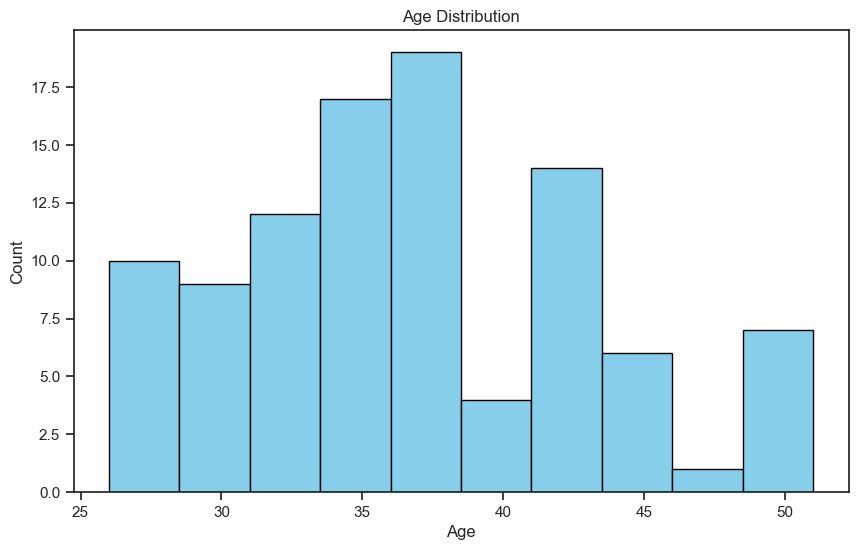

In [39]:
# Visualize the distribution of age using Matplotlib histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


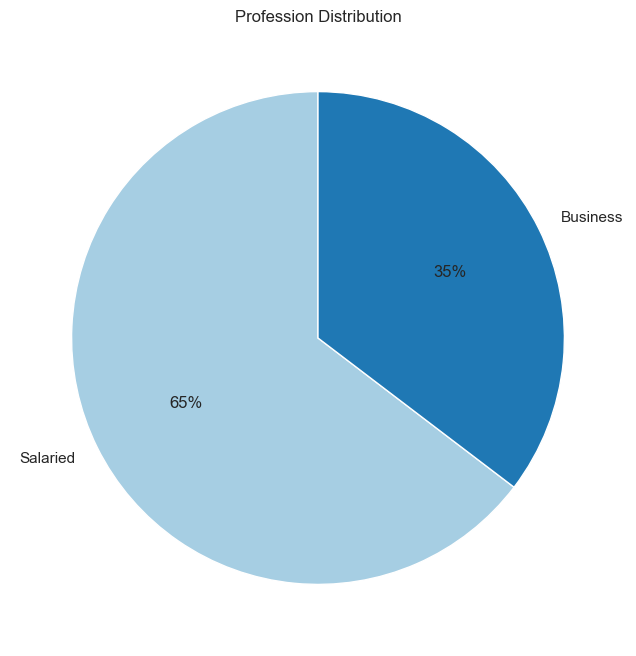

In [40]:
# Visualize profession distribution using Matplotlib pie chart
plt.figure(figsize=(10, 8))
profession_counts = data['Profession'].value_counts()
plt.pie(profession_counts, labels=profession_counts.index, autopct='%1.0f%%', startangle=90, colors=plt.cm.Paired(range(len(profession_counts))))
plt.title('Profession Distribution')
plt.show()


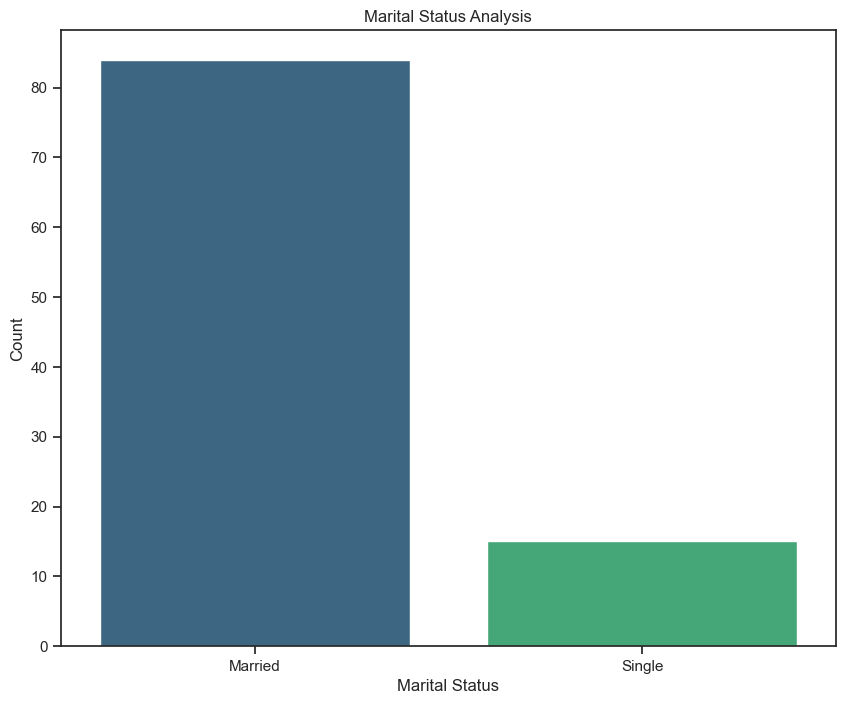

In [41]:
# Marital Status Analysis using Matplotlib bar plot
plt.figure(figsize=(10, 8))
marital_status_counts = data['Marrital Status'].value_counts()
sns.barplot(x=marital_status_counts.index, y=marital_status_counts, palette="viridis")
plt.title('Marital Status Analysis')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


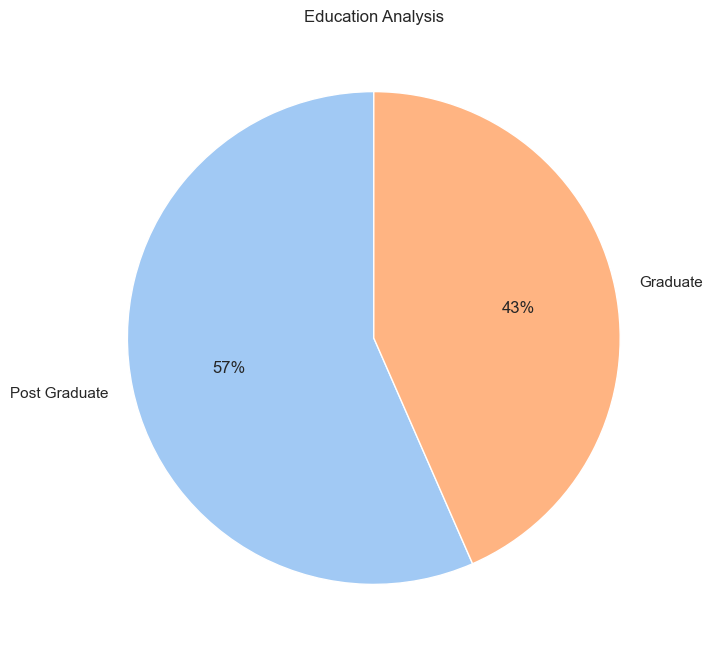

In [42]:
# Education Analysis using Matplotlib pie chart
plt.figure(figsize=(10, 8))
education_counts = data['Education'].value_counts()
plt.pie(education_counts, labels=education_counts.index, autopct='%1.0f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Education Analysis')
plt.show()


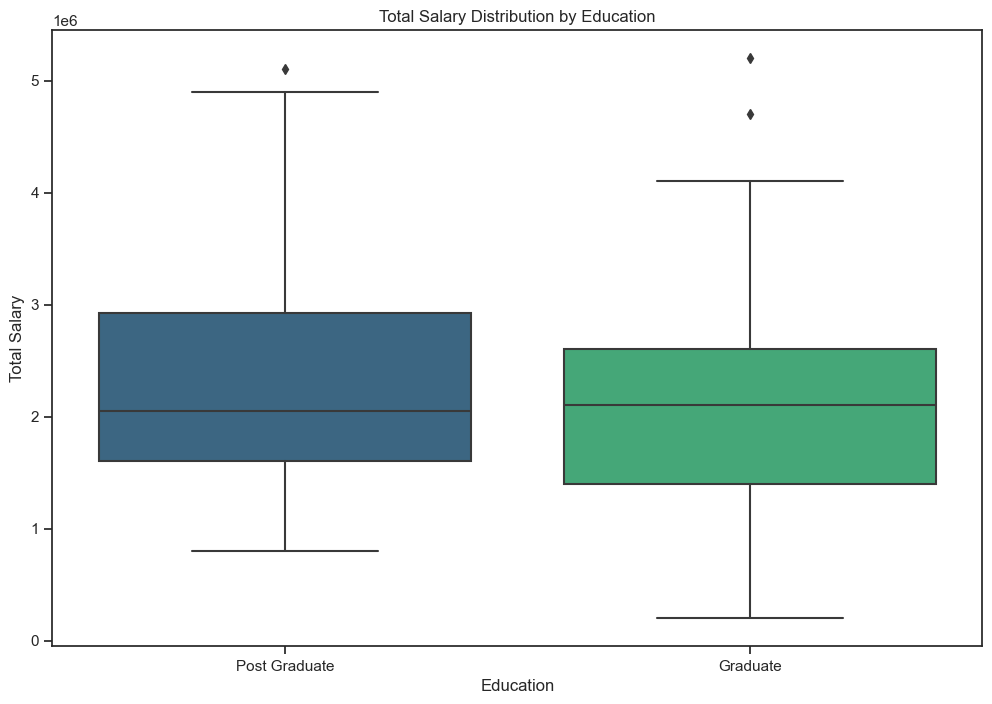

In [43]:
# Total Salary Distribution by Education using Matplotlib box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Education', y='Total Salary', data=data, palette='viridis')
plt.title('Total Salary Distribution by Education')
plt.xlabel('Education')
plt.ylabel('Total Salary')
plt.show()


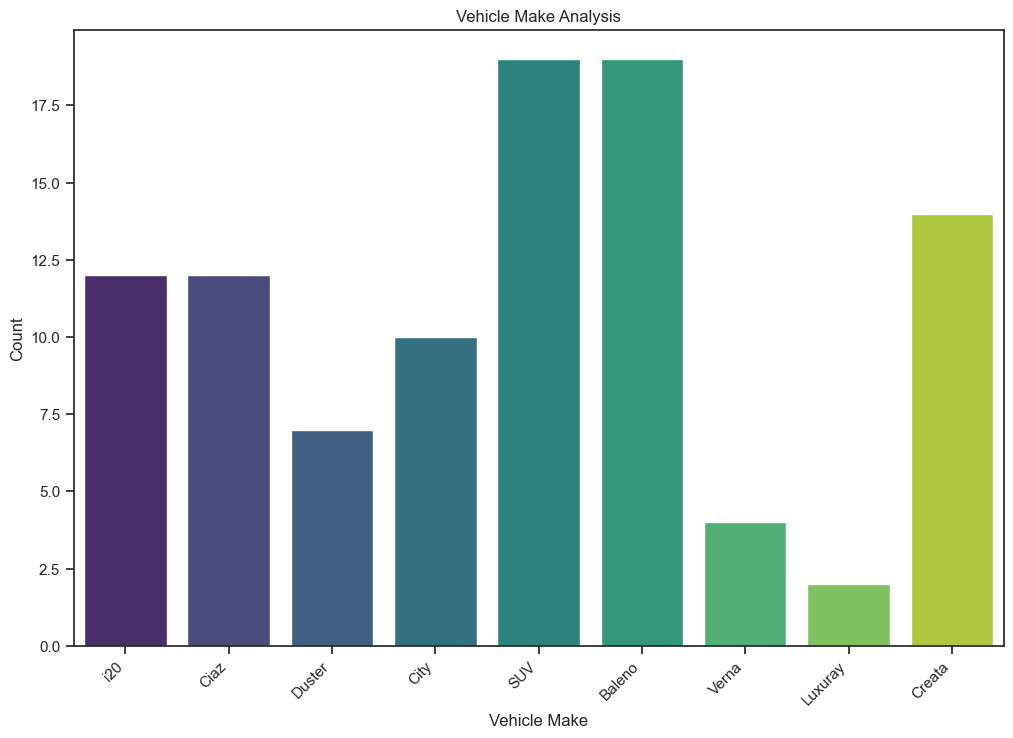

In [44]:
# Vehicle Make Analysis using Matplotlib bar plot
plt.figure(figsize=(12, 8))
sns.countplot(x='Make', data=data, palette='viridis')
plt.title('Vehicle Make Analysis')
plt.xlabel('Vehicle Make')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


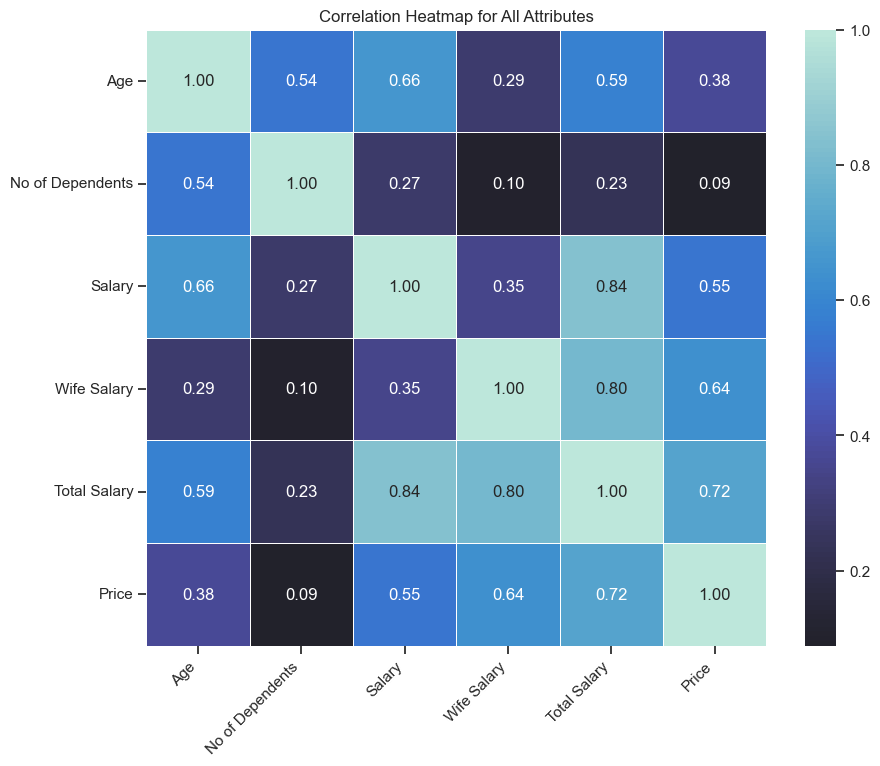

In [46]:
# Calculate the correlation matrix for all attributes
corr_matrix_all = data.corr()

# Set up the figure and axes
plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap for All Attributes')

# Create the heatmap with more customization
sns.heatmap(corr_matrix_all, annot=True, fmt=".2f", cmap="icefire_r", center=0, linewidths=0.5)

# Adjust tick labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()


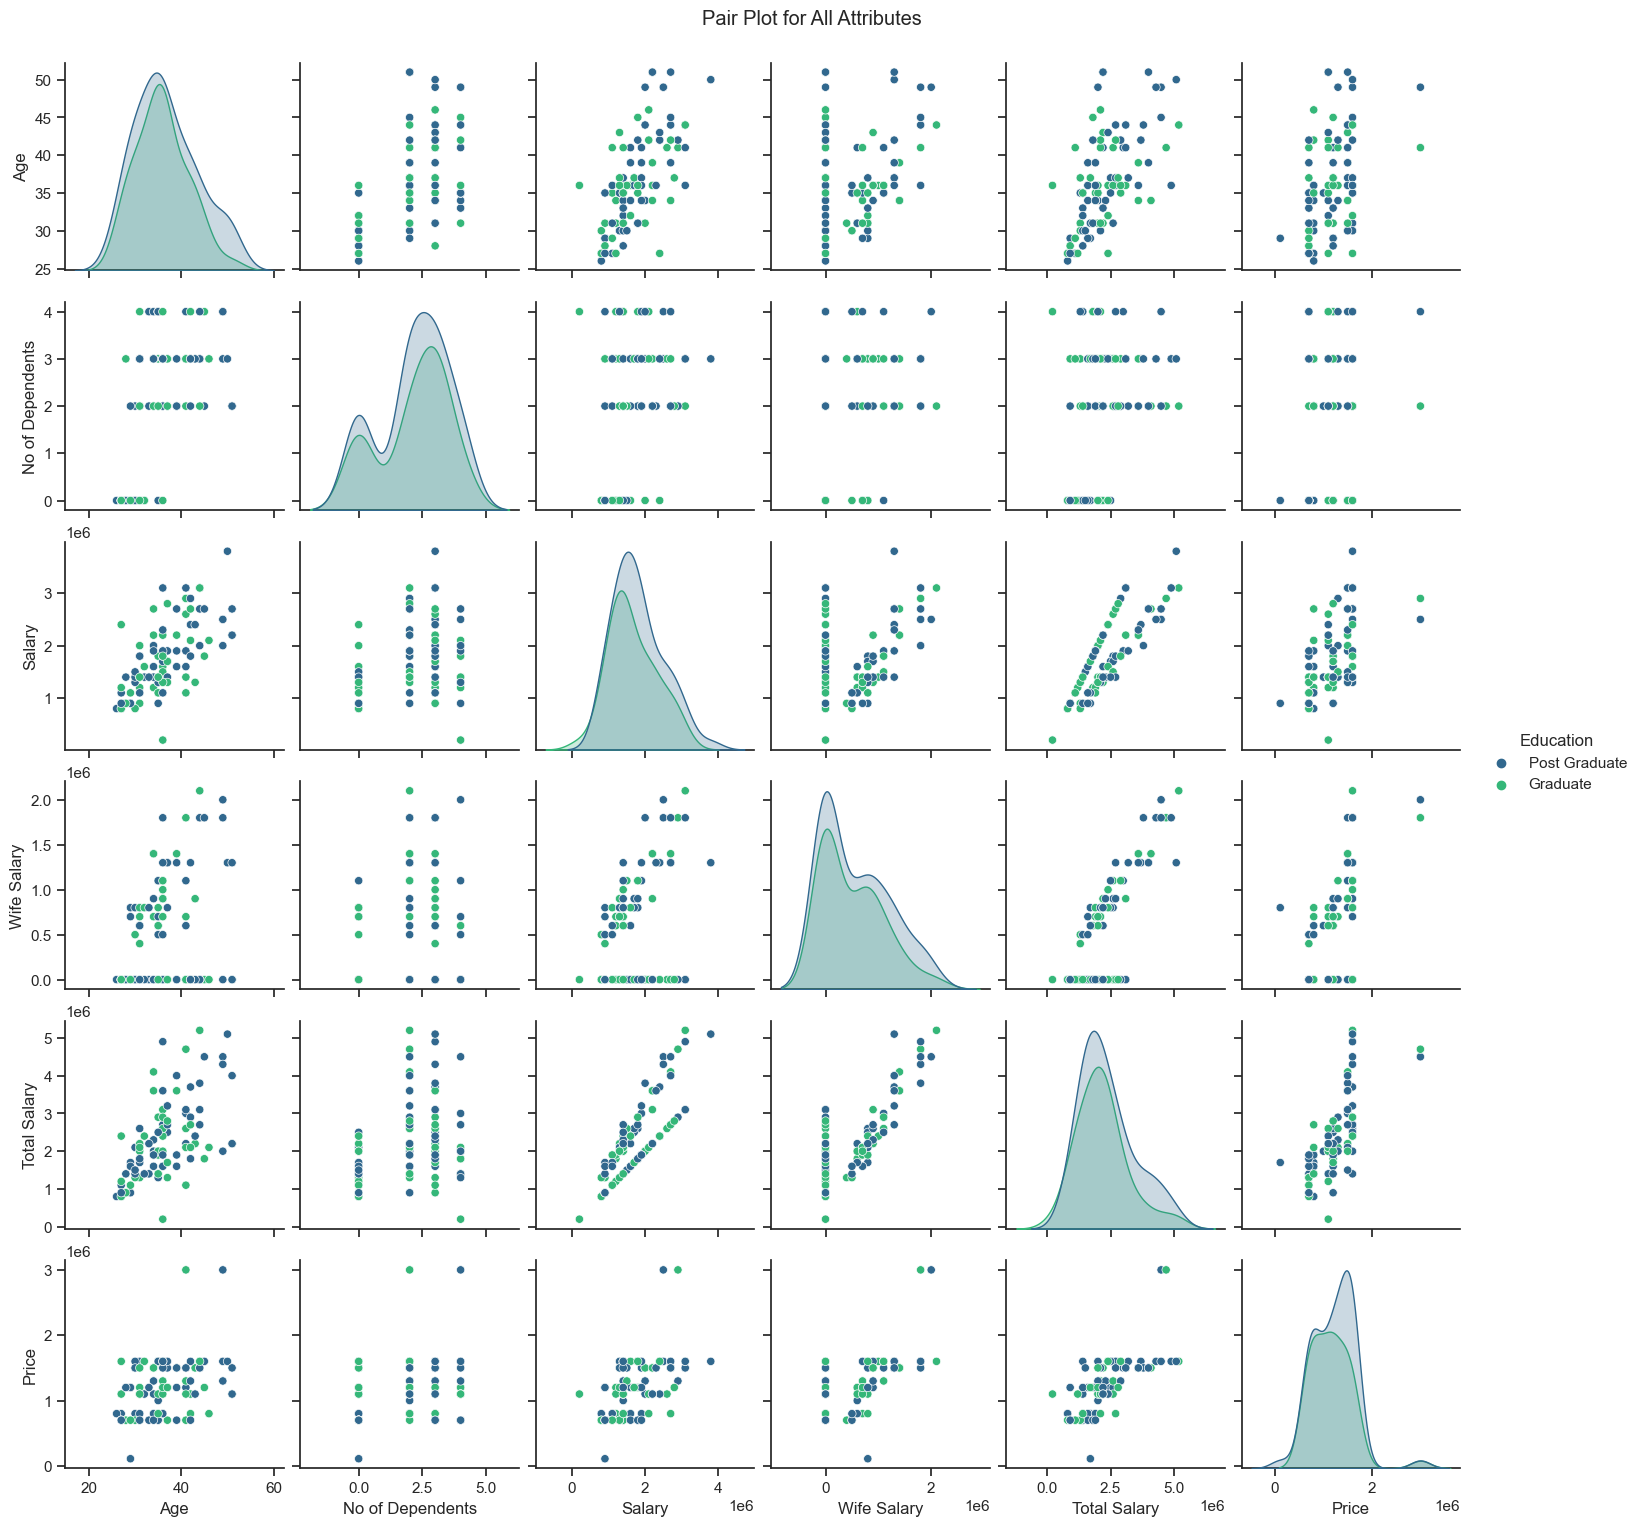

In [47]:
# Define all attributes
all_attributes = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price',
                  'Profession', 'Marrital Status', 'Education', 'Personal loan', 'House Loan', 'Wife Working', 'Make']

# Create a pair plot using Seaborn
sns.set(style="ticks")
sns.pairplot(data[all_attributes], hue='Education', diag_kind='kde', palette='viridis')
plt.suptitle('Pair Plot for All Attributes', y=1.02)
plt.show()

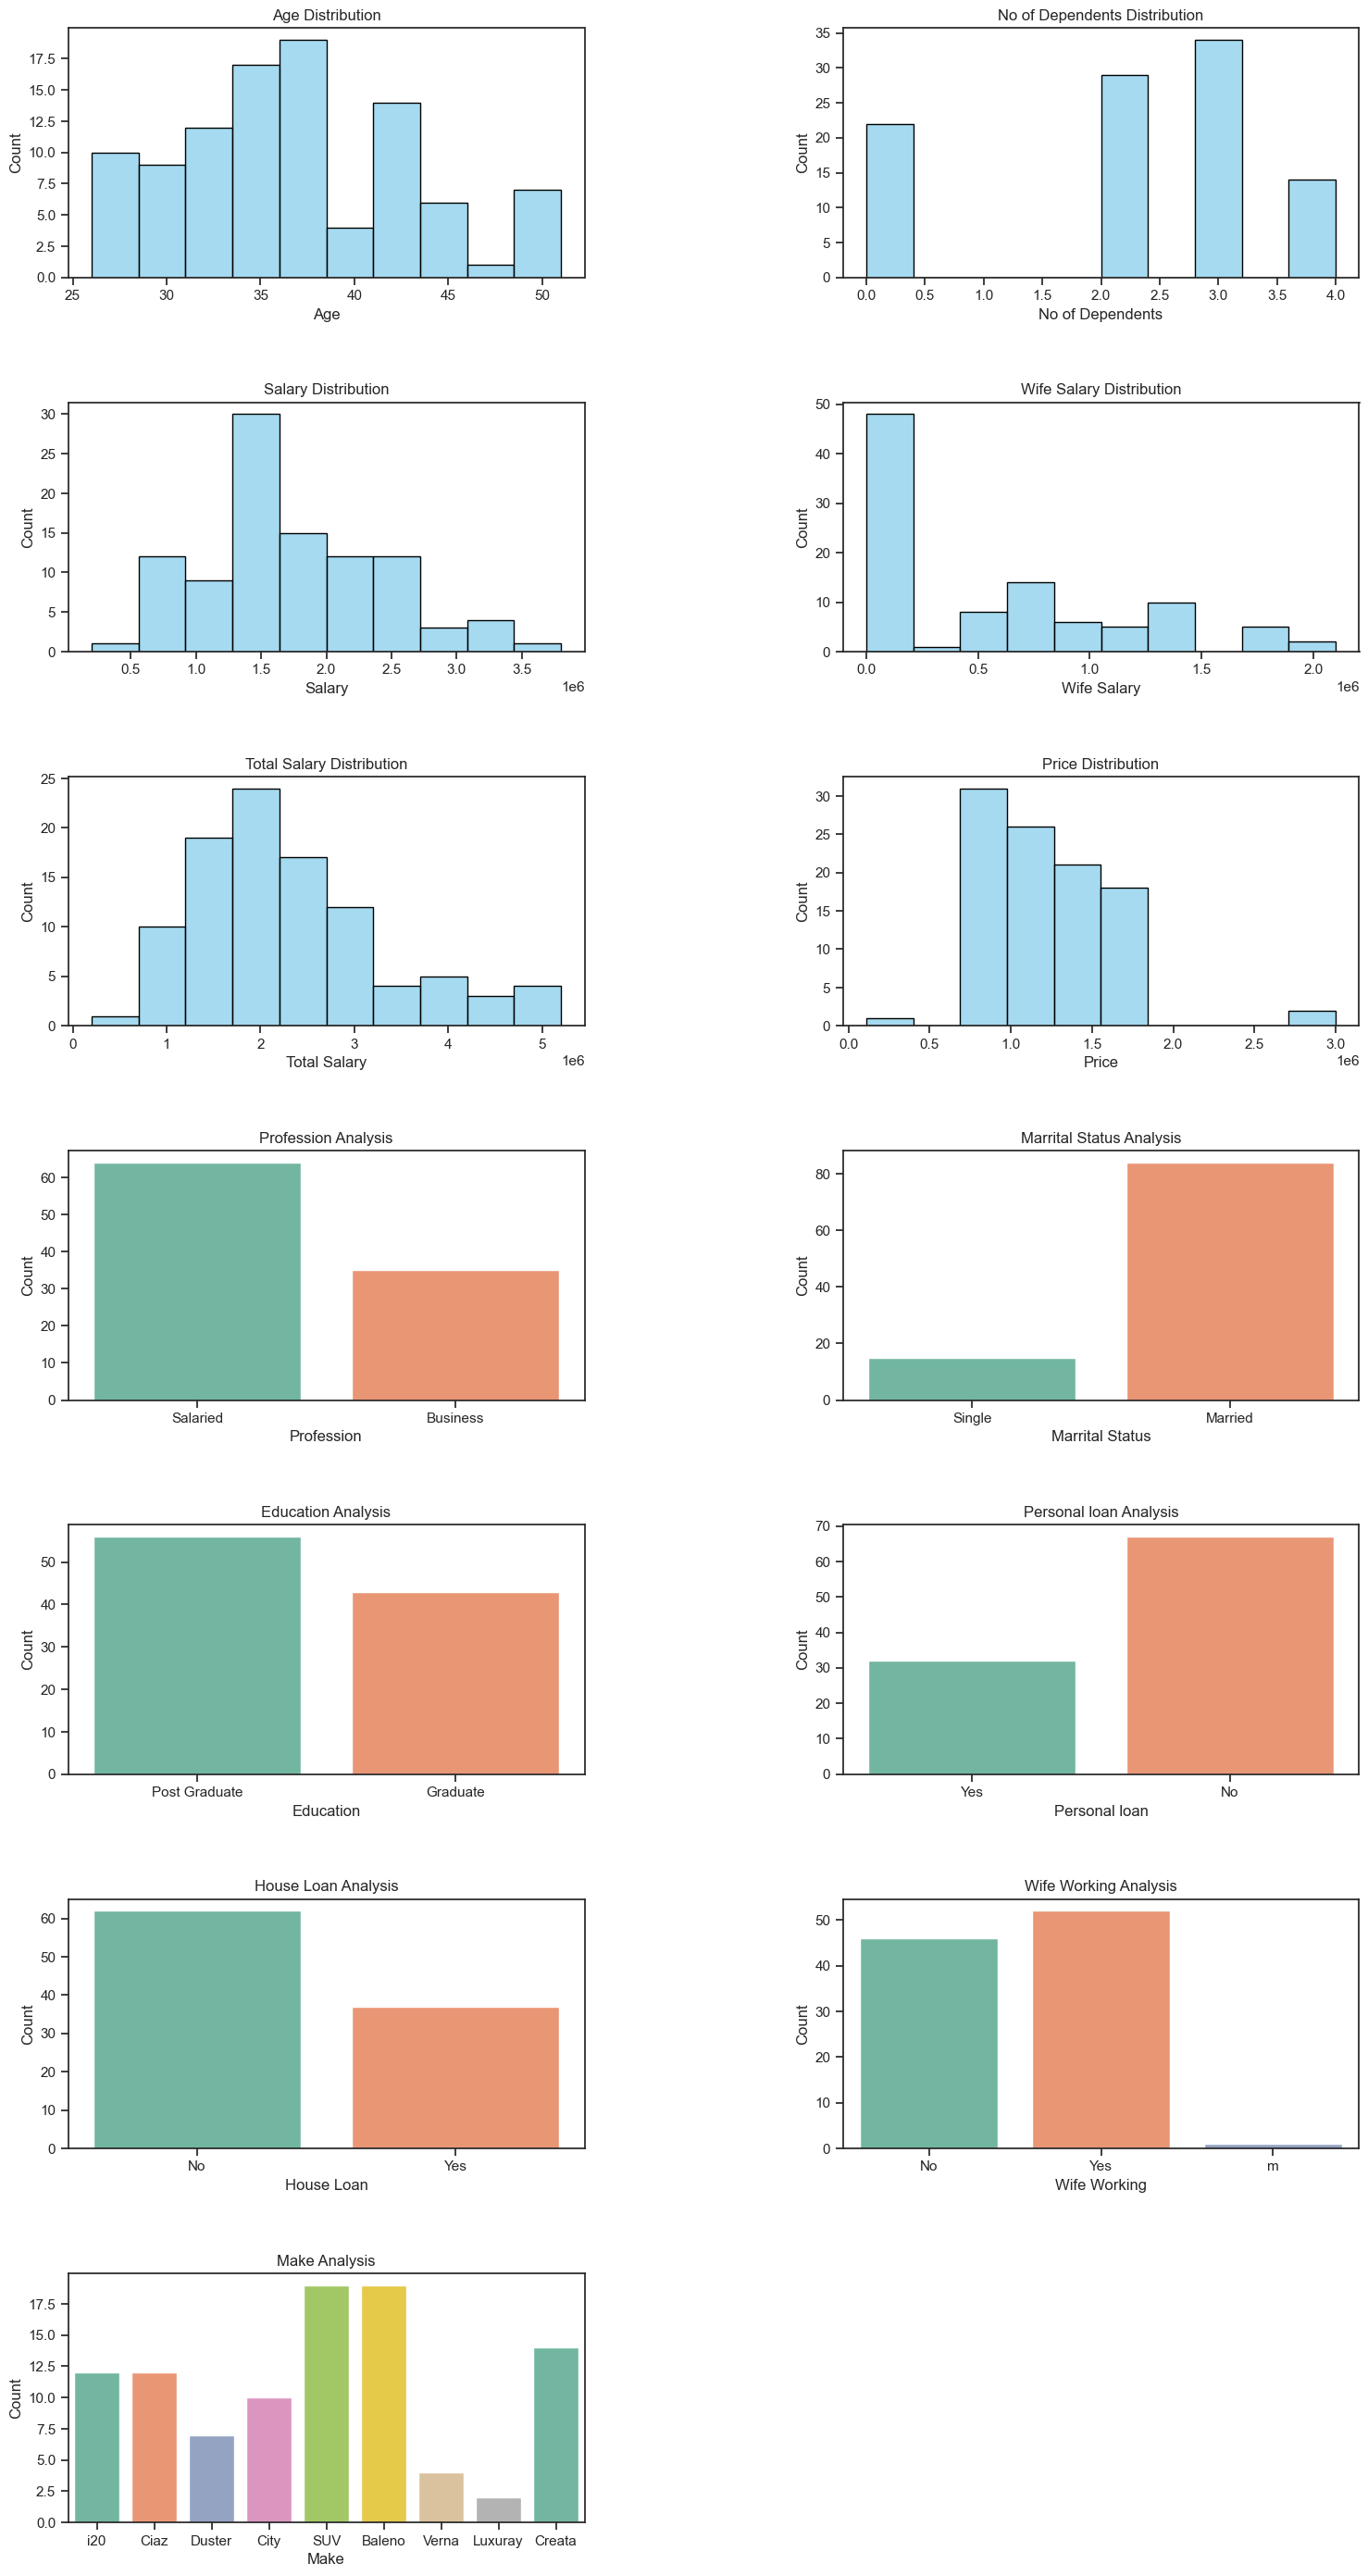

In [48]:
# Define all attributes
all_attributes = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price',
                  'Profession', 'Marrital Status', 'Education', 'Personal loan', 'House Loan', 'Wife Working', 'Make']

# Identify categorical columns
categorical_columns = ['Profession', 'Marrital Status', 'Education', 'Personal loan', 'House Loan', 'Wife Working', 'Make']

# Create subplots based on the number of attributes
num_rows = len(all_attributes) // 2 + len(all_attributes) % 2
num_cols = 2
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 5 * num_rows))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Iterate through each attribute and create count plots
for i, attribute in enumerate(all_attributes):
    current_row = i // num_cols
    current_col = i % num_cols

    if attribute in categorical_columns:
        sns.countplot(data=data, x=attribute, palette="Set2", ax=axes[current_row, current_col])
        axes[current_row, current_col].set_title(f'{attribute} Analysis')
        axes[current_row, current_col].set_xlabel(attribute)
        axes[current_row, current_col].set_ylabel('Count')
    else:
        sns.histplot(data=data, x=attribute, bins=10, color='skyblue', edgecolor='black', ax=axes[current_row, current_col])
        axes[current_row, current_col].set_title(f'{attribute} Distribution')
        axes[current_row, current_col].set_xlabel(attribute)
        axes[current_row, current_col].set_ylabel('Count')

# If there are an odd number of attributes, remove the empty subplot
if len(all_attributes) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.show()
